<a href="https://colab.research.google.com/github/antonsysoev/Ass/blob/main/Clustering_Umfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
#library(factoextra) # clustering algorithms & visualization

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
%%R
library("readxl")

In [4]:
%%R

my_data_xlsx <- na.omit(read_excel("/content/Alle_Umfall_2910.xlsx"))

In [5]:
%%R

summary(my_data_xlsx)

    Vid_DTP            Pol        Sotsialnaya_harakteristika
 Min.   : 1.000   Min.   :1.000   Min.   : 1.000            
 1st Qu.: 1.000   1st Qu.:1.000   1st Qu.: 1.000            
 Median : 1.000   Median :1.000   Median : 1.000            
 Mean   : 1.474   Mean   :1.187   Mean   : 2.711            
 3rd Qu.: 2.000   3rd Qu.:1.000   3rd Qu.: 2.000            
 Max.   :11.000   Max.   :2.000   Max.   :38.000            
 Neposredstvennye_narusheniya_PDD Soputstvuyushchie_narusheniya_PDD
 Min.   : 1.000                   Min.   : 1.000                   
 1st Qu.: 2.000                   1st Qu.: 2.000                   
 Median : 2.000                   Median : 2.000                   
 Mean   : 3.199                   Mean   : 3.419                   
 3rd Qu.: 4.000                   3rd Qu.: 2.000                   
 Max.   :24.000                   Max.   :32.000                   
     Stazh          Vozrast     
 Min.   : 0.00   Min.   :14.35  
 1st Qu.: 5.00   1st Qu.:26.18 

In [ ]:
%%R

summary(my_data_xlsx)

    Vid dtp            Pol        Soc.harakteristika
 Min.   : 1.000   Min.   :1.000   Min.   : 1.000    
 1st Qu.: 1.000   1st Qu.:1.000   1st Qu.: 1.000    
 Median : 1.000   Median :1.000   Median : 1.000    
 Mean   : 1.474   Mean   :1.187   Mean   : 2.711    
 3rd Qu.: 2.000   3rd Qu.:1.000   3rd Qu.: 2.000    
 Max.   :11.000   Max.   :2.000   Max.   :38.000    
 Neposredstvennye narusheniya PDD Soputstvuyushchie narusheniya PDD
 Min.   : 1.000                   Min.   : 1.000                   
 1st Qu.: 2.000                   1st Qu.: 2.000                   
 Median : 2.000                   Median : 2.000                   
 Mean   : 3.199                   Mean   : 3.419                   
 3rd Qu.: 4.000                   3rd Qu.: 2.000                   
 Max.   :24.000                   Max.   :32.000                   
   Stazh(let)       Vozrast     
 Min.   : 0.00   Min.   :14.35  
 1st Qu.: 5.00   1st Qu.:26.18  
 Median :11.00   Median :32.24  
 Mean   :13.44   Mean

In [ ]:
%%R
my_data_1 <- read_excel("/content/DTP_bez_postr_2019.xlsx")

R[write to console]: Error: `path` does not exist: ‘/content/DTP_bez_postr_2019.xlsx’




Error: `path` does not exist: ‘/content/DTP_bez_postr_2019.xlsx’


RInterpreterError: ignored

In [ ]:
%%R
summary(my_data_1)

R[write to console]: Error in summary(my_data_1) : object 'my_data_1' not found

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In system("timedatectl", intern = TRUE) :
R[write to console]: 
 
R[write to console]:  running command 'timedatectl' had status 1




Error in summary(my_data_1) : object 'my_data_1' not found


RInterpreterError: ignored

In [6]:
%%R

my_data <- scale(my_data_xlsx)


In [9]:
%%R

k2 <- kmeans(my_data, centers = 5, nstart = 25)

In [10]:
%%R

my_data_xlsx$cluster <- k2$cluster 

In [11]:
%%R

length(my_data_xlsx$Pol)

[1] 44578


In [12]:
%%R
install.packages("writexl")
library(writexl)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/writexl_1.4.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 258516 bytes (252 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [13]:
%%R

write_xlsx(my_data_xlsx, "/content/results.xlsx")

In [ ]:
%%R
kmeans_basic_df <- data.frame(Cluster = k2$cluster, my_data)

In [ ]:
%%R
kmeans_basic_df

    Cluster    vid.dtp      Tip.TS Narushenie.PDD        Pol Stazh.vozhdeniya
1         5  0.8234405 -0.24008931     -0.7268618 -0.4755514     -0.404748237
2         5  0.3524745 -0.24008931      1.0113045 -0.4755514     -0.808211559
3         5 -1.0604234 -0.24008931      1.0113045 -0.4755514     -0.556046983
4         6 -1.0604234 -0.15538365     -1.0945509  2.0131678     -0.656912813
5         4 -1.0604234 -0.32479498      1.0113045 -0.4755514      0.856074644
6         2 -1.0604234 -0.24008931     -1.0276983 -0.4755514     -0.808211559
7         2 -1.0604234 -0.24008931     -1.0276983 -0.4755514     -0.001284915
8         6 -1.0604234 -0.40950065     -0.6600093  2.0131678     -0.354315322
9         3 -0.5894574 -0.15538365      1.0113045 -0.4755514      3.932482474
10        4  3.1782705 -0.74832332     -0.4928779 -0.4755514     -0.354315322
11        6  0.8234405 -0.24008931      1.0113045  2.0131678     -0.606479898
12        6  0.8234405 -0.24008931     -0.7268618  2.0131678    

In [ ]:
%%R

library(ggplot2)

In [7]:
%%R

library(purrr)

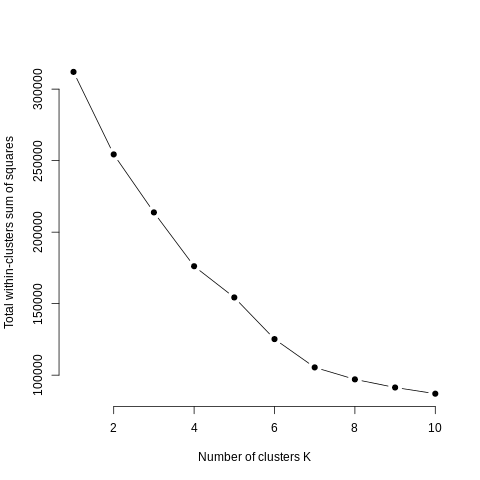

In [8]:
%%R

set.seed(123)

# function to compute total within-cluster sum of square 
wss <- function(k) {
  kmeans(my_data, k, nstart = 10 )$tot.withinss
}

# Compute and plot wss for k = 1 to k = 15
k.values <- 1:10

# extract wss for 2-15 clusters
wss_values <- map_dbl(k.values, wss)

plot(k.values, wss_values,
       type="b", pch = 19, frame = FALSE, 
       xlab="Number of clusters K",
       ylab="Total within-clusters sum of squares")

In [ ]:
%%R

library(cluster)

In [ ]:
%%R

# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- kmeans(my_data, centers = k, nstart = 25)
  ss <- silhouette(km.res$cluster, dist(my_data))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:5

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

In [ ]:
%%R

# compute gap statistic
set.seed(123)
gap_stat <- clusGap(my_data, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
# Print the result
print(gap_stat, method = "firstmax")

Clustering k = 1,2,..., K.max (= 10): .. done
Bootstrapping, b = 1,2,..., B (= 50)  [one "." per sample]:
.................................................. 50 
Clustering Gap statistic ["clusGap"] from call:
clusGap(x = my_data, FUNcluster = kmeans, K.max = 10, B = 50,     nstart = 25)
B=50 simulated reference sets, k = 1..10; spaceH0="scaledPCA"
 --> Number of clusters (method 'firstmax'): 1
          logW   E.logW       gap      SE.sim
 [1,] 5.790719 6.561125 0.7704059 0.010714738
 [2,] 5.699502 6.454491 0.7549892 0.009050616
 [3,] 5.644588 6.402681 0.7580932 0.009082395
 [4,] 5.577646 6.363753 0.7861070 0.008659288
 [5,] 5.527821 6.335862 0.8080409 0.008845769
 [6,] 5.498316 6.311290 0.8129738 0.009179733
 [7,] 5.473254 6.289627 0.8163727 0.009676754
 [8,] 5.446664 6.269638 0.8229741 0.009590343
 [9,] 5.405001 6.251795 0.8467944 0.009990563
[10,] 5.367494 6.234830 0.8673363 0.009801157


In [ ]:
%%R

#fviz_gap_stat(gap_stat)

NULL


In [ ]:
%%R

clusters <- hclust(dist(my_data))
plot(clusters)

In [ ]:
%%R
install.packages('ape')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ape_5.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1751486 bytes (1.7 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

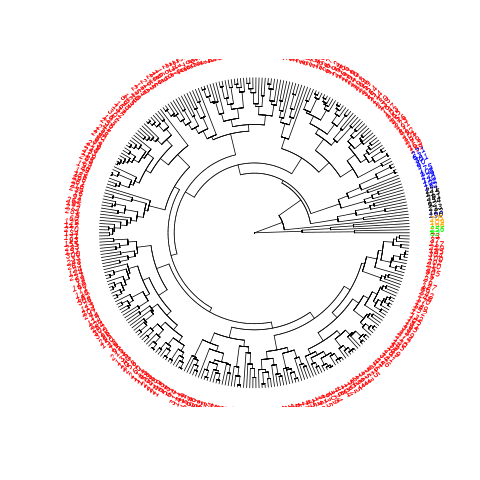

In [ ]:
%%R
library(ape)
colors = c("red", "blue", "green", "black", "orange", "darkblue")
clus6 = cutree(clusters, 6)
plot(as.phylo(clusters), type = "fan", tip.color = colors[clus6],
     label.offset = 1, cex = 0.7)

In [15]:
%%R
install.packages("pvclust")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/pvclust_2.2-0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 105190 bytes (102 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

Непонятно, что... Результат --- близость факторов

In [16]:
%%R
library(pvclust)
set.seed(1234)
result <- pvclust(my_data_1[1:length(my_data_1$Gender),], method.dist="cor", 
                  method.hclust="average", nboot=1000)

R[write to console]: Error in nrow(data) : object 'my_data_1' not found




Error in nrow(data) : object 'my_data_1' not found


RInterpreterError: ignored

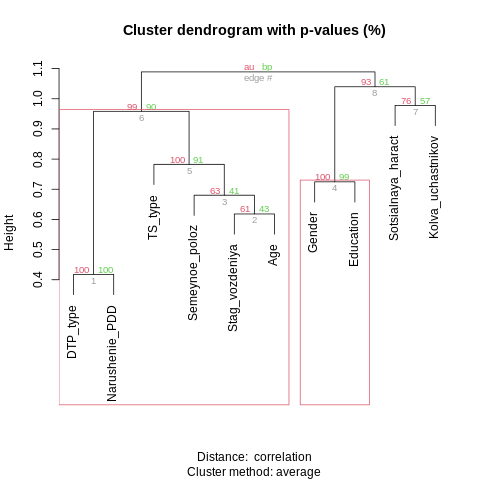

In [ ]:
%%R

plot(result)
pvrect(result)

In [17]:
%%R

library(dplyr)

In [18]:
%%R

counts <- my_data_xlsx %>%
          group_by(cluster)

In [19]:
%%R

counts

# A tibble: 44,578 × 8
# Groups:   cluster [5]
   Vid_DTP   Pol Sotsialnaya_harak… Neposredstvennye_n… Soputstvuyushchie… Stazh
     <dbl> <dbl>              <dbl>               <dbl>              <dbl> <dbl>
 1       1     1                  1                   1                  2    13
 2       2     2                  1                   1                  2    11
 3       1     1                  1                   1                  2    20
 4       1     1                  1                   2                  2    10
 5       1     2                  1                   2                  2    10
 6       2     1                  2                   2                  2    22
 7       1     1                  1                   4                  2    17
 8       2     1                 12                   1                  2     1
 9       2     1                  1                   2                  2     0
10       2     1                  2                   2       

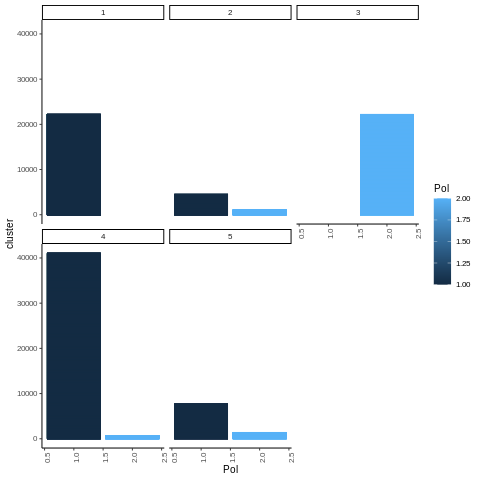

In [20]:
%%R

ggplot(counts, aes(x = Pol, y = cluster,
                   color=Pol, 
                   fill= Pol)) +
   geom_bar(stat="identity") + 
  theme_classic(base_size = 10) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~cluster, ncol=3)


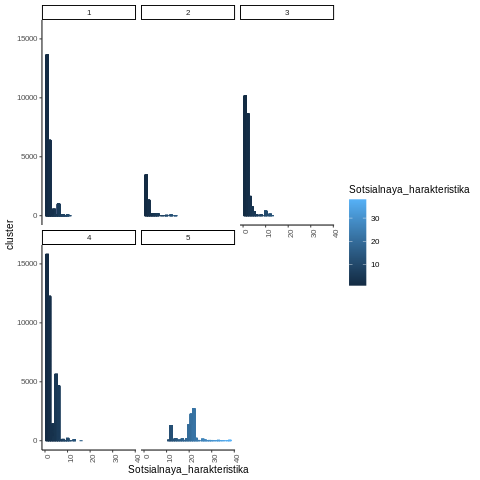

In [21]:
%%R

ggplot(counts, aes(x = Sotsialnaya_harakteristika, y = cluster,
                   color= Sotsialnaya_harakteristika, 
                   fill= Sotsialnaya_harakteristika)) +
   geom_bar(stat="identity") + 
  theme_classic(base_size = 10) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~cluster, ncol=3)

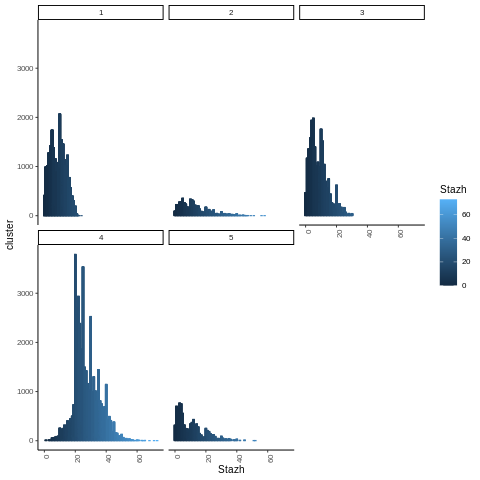

In [22]:
%%R

ggplot(counts, aes(x = Stazh, y = cluster,
                   color= Stazh, 
                   fill= Stazh)) +
   geom_bar(stat="identity") + 
  theme_classic(base_size = 10) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~cluster, ncol=3)

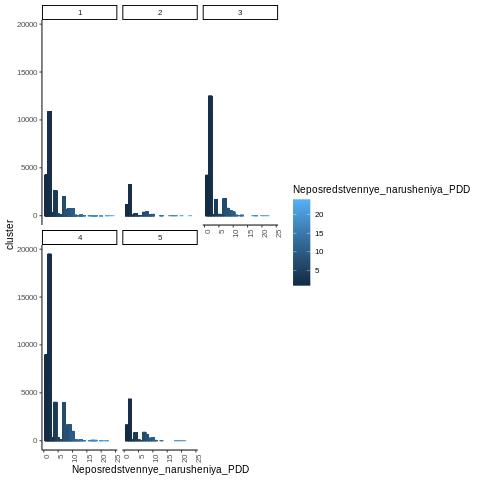

In [23]:
%%R

ggplot(counts, aes(x = Neposredstvennye_narusheniya_PDD, y = cluster,
                   color= Neposredstvennye_narusheniya_PDD, 
                   fill= Neposredstvennye_narusheniya_PDD)) +
   geom_bar(stat="identity") + 
  theme_classic(base_size = 10) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~cluster, ncol=3)

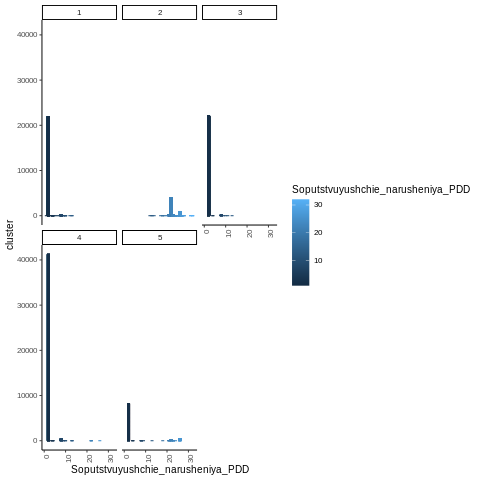

In [24]:
%%R

ggplot(counts, aes(x = Soputstvuyushchie_narusheniya_PDD, y = cluster,
                   color= Soputstvuyushchie_narusheniya_PDD, 
                   fill= Soputstvuyushchie_narusheniya_PDD)) +
   geom_bar(stat="identity") + 
  theme_classic(base_size = 10) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~cluster, ncol=3)

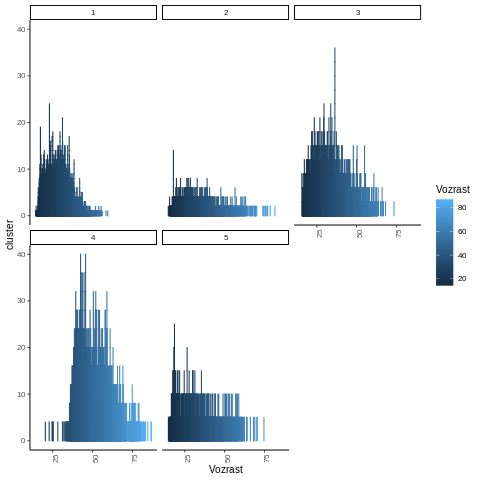

In [25]:
%%R

ggplot(counts, aes(x = Vozrast, y = cluster,
                   color= Vozrast, 
                   fill= Vozrast)) +
   geom_bar(stat="identity") + 
  theme_classic(base_size = 10) +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  facet_wrap(~cluster, ncol=3)